# Food.com

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval
import numpy as np
import seaborn as sns

### Datasets

In [2]:
recipes_df = pd.read_csv('../Data/full_recipes.csv')
ratings_df = pd.read_csv('../Data/user_interactions.csv')

## Ratings 

In [4]:
ratings_df.head()

,user_id,recipe_id,date,rating,review
0,1509050,99998.0,2022-01-01T00:00:00+00:00,5.0,"Substituted cayenne for wasabi, which we hate...."
1,672182,99998.0,2022-01-01T00:00:00+00:00,5.0,Wow - what a great & easy recipe to add to you...
2,983557,99996.0,2022-01-01T00:00:00+00:00,5.0,I tripled this recipe so id have it on hand fo...
3,1402541,99996.0,2022-01-01T00:00:00+00:00,5.0,"My husband and I love this Recipe. BUT, when ..."
4,1114506,99996.0,2022-01-01T00:00:00+00:00,5.0,Simple. Fast. Healthy. Tasty.


### Weighted Ratings

In [7]:
weighted_ratings_df = ratings_df.copy()
weighted_ratings_df = weighted_ratings_df.drop(['date', 'review'], axis=1)
weighted_ratings_df = weighted_ratings_df.groupby(['recipe_id', 'rating']).count()
weighted_ratings_df = weighted_ratings_df.rename(columns={"user_id": "users"})
weighted_ratings_df.reset_index(inplace=True)
weighted_ratings_df.head()

,recipe_id,rating,users
0,0.0,0.0,18
1,1.0,0.0,22
2,1.0,4.0,1
3,1.0,5.0,1
4,2.0,0.0,35


### Distribution of recipes ratings

<AxesSubplot:>

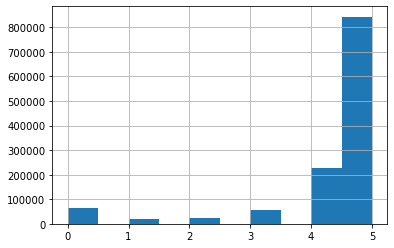

In [8]:
weighted_ratings_df['rating'].hist(histtype='bar', weights=weighted_ratings_df['users'])

### Average Ratings

In [9]:
average_ratings_df = ratings_df.copy()
average_ratings_df = average_ratings_df[['recipe_id', 'rating']]
average_ratings_df = average_ratings_df.groupby('recipe_id').agg({'rating':'mean'})
average_ratings_df.reset_index(inplace=True)
average_ratings_df.head()

,recipe_id,rating
0,0.0,0.000000
1,1.0,0.375000
2,2.0,0.138889
3,3.0,0.000000
4,4.0,0.000000


## Recipes

In [10]:
recipes_df.head()

,name,id,minutes,contributor_id,nutrition,n_steps,steps,ingredients,n_ingredients
0,Tuna Kabobs,99998,25,Lorac,"['219.5', '7233', '8.112', '1.99', '53.917', '...",4,"['Preheat grill to medium high.', 'Combine soy...","['soy sauce', 'rice vinegar', 'toasted sesame ...",7
1,South Beach Diet Balsamic Vinaigrette,99996,5,papergoddess,"['142.7', '12991', '14.422', '29', '00', '120....",3,['Combine all ingredients in a jar or containe...,"['extra virgin olive oil', 'balsamic vinegar',...",6
2,All to Myself Cheesecake,99995,45,Claudia Dawn,"['268.5', '16963', '18.828', '9.748', '72.724'...",7,"['Beat cream cheese, sugar, vanilla and eggs t...","['reo cookies tops separated from bottoms', 'c...",7
3,Feta Potatoes,99994,45,Dawnab,"['264.3', '12648', '14.121', '7.838', '43.614'...",3,"['Preheat oven to 375.', 'combine all ingredie...",['frozen cubed hash brown potatoes southern st...,5
4,Shish Kabob Marinade,99992,125,jenjill,"['75.8', '01', '0.10', '00', '00', '117348', '...",4,"['Mix all ingredients together.', 'Add meat (c...","['soy sauce', 'ketchup', 'sugar', 'ginger', 'g...",5


### Exploding the dataset

In [11]:
raw_recipes_df = recipes_df.copy()
raw_recipes_df = raw_recipes_df.rename({"id":"recipe_id"}, axis=1)
merged_recipes_df = pd.merge(raw_recipes_df, average_ratings_df, on="recipe_id")
merged_recipes_df.head()

,name,recipe_id,minutes,contributor_id,nutrition,n_steps,steps,ingredients,n_ingredients,rating
0,Tuna Kabobs,99998,25,Lorac,"['219.5', '7233', '8.112', '1.99', '53.917', '...",4,"['Preheat grill to medium high.', 'Combine soy...","['soy sauce', 'rice vinegar', 'toasted sesame ...",7,5.0
1,South Beach Diet Balsamic Vinaigrette,99996,5,papergoddess,"['142.7', '12991', '14.422', '29', '00', '120....",3,['Combine all ingredients in a jar or containe...,"['extra virgin olive oil', 'balsamic vinegar',...",6,5.0
2,All to Myself Cheesecake,99995,45,Claudia Dawn,"['268.5', '16963', '18.828', '9.748', '72.724'...",7,"['Beat cream cheese, sugar, vanilla and eggs t...","['reo cookies tops separated from bottoms', 'c...",7,4.8
3,Feta Potatoes,99994,45,Dawnab,"['264.3', '12648', '14.121', '7.838', '43.614'...",3,"['Preheat oven to 375.', 'combine all ingredie...",['frozen cubed hash brown potatoes southern st...,5,4.5
4,Shish Kabob Marinade,99992,125,jenjill,"['75.8', '01', '0.10', '00', '00', '117348', '...",4,"['Mix all ingredients together.', 'Add meat (c...","['soy sauce', 'ketchup', 'sugar', 'ginger', 'g...",5,4.6


In [13]:
merged_recipes_exploded = merged_recipes_df.copy()
merged_recipes_exploded = merged_recipes_exploded[merged_recipes_exploded['ingredients'] != "empty ingredients"]
merged_recipes_exploded['ingredients'] = merged_recipes_exploded['ingredients'].apply(literal_eval) 
merged_recipes_exploded = merged_recipes_exploded.explode('ingredients')
merged_recipes_exploded.head()

,name,recipe_id,minutes,contributor_id,nutrition,n_steps,steps,ingredients,n_ingredients,rating
0,Tuna Kabobs,99998,25,Lorac,"['219.5', '7233', '8.112', '1.99', '53.917', '...",4,"['Preheat grill to medium high.', 'Combine soy...",soy sauce,7,5.0
0,Tuna Kabobs,99998,25,Lorac,"['219.5', '7233', '8.112', '1.99', '53.917', '...",4,"['Preheat grill to medium high.', 'Combine soy...",rice vinegar,7,5.0
0,Tuna Kabobs,99998,25,Lorac,"['219.5', '7233', '8.112', '1.99', '53.917', '...",4,"['Preheat grill to medium high.', 'Combine soy...",toasted sesame oil,7,5.0
0,Tuna Kabobs,99998,25,Lorac,"['219.5', '7233', '8.112', '1.99', '53.917', '...",4,"['Preheat grill to medium high.', 'Combine soy...",wasabi powder mixed with,7,5.0
0,Tuna Kabobs,99998,25,Lorac,"['219.5', '7233', '8.112', '1.99', '53.917', '...",4,"['Preheat grill to medium high.', 'Combine soy...",water,7,5.0


## Ingredients Stats

In [14]:
exploded_df = merged_recipes_exploded.copy()
ingredient_group_df = exploded_df.groupby('ingredients').agg(recipe_count=('recipe_id', 'count'), \
                                                             rating_count=('rating', 'count'), \
                                                             rating_mean=('rating', 'mean'))
ingredient_group_df['frequency'] = ingredient_group_df['recipe_count'] / recipes_df.shape[0]
ingredient_group_df.reset_index(inplace=True)
ingredient_group_df.head()

,ingredients,recipe_count,rating_count,rating_mean,frequency
0,,10229,10229,4.338211,0.017536
1,"""good eats"" cranberry sauce, recipe follows",1,1,4.875000,0.000002
2,'hearty' chicken stock or broth,1,1,4.636364,0.000002
3,*note: if you use dehydrated tomatoes ? add a ...,1,1,4.800000,0.000002
4,*toasted kaiser rolls,1,1,5.000000,0.000002


### Ingredient Score

In [15]:
# Count the used ingredients
ingredients_stat_df = ingredient_group_df.copy()
ingredients_stat_df = ingredients_stat_df.sort_values(by=['frequency'], ascending=False, axis=0)
ingredients_stat_df.head()

,ingredients,recipe_count,rating_count,rating_mean,frequency
309311,salt,92663,92663,4.293477,0.158857
340064,sugar,51818,51818,4.272470,0.088834
374748,water,35611,35611,4.241015,0.061050
40919,butter,34276,34276,4.323757,0.058761
242700,olive oil,33539,33539,4.380756,0.057498


### Frequency of ingredients used

In [16]:
frequency_df = ingredients_stat_df.copy()
frequency_df = frequency_df[['ingredients','frequency']]
frequency_df.head()

,ingredients,frequency
309311,salt,0.158857
340064,sugar,0.088834
374748,water,0.061050
40919,butter,0.058761
242700,olive oil,0.057498


### Top 10 popular Ingredients in the Dataset

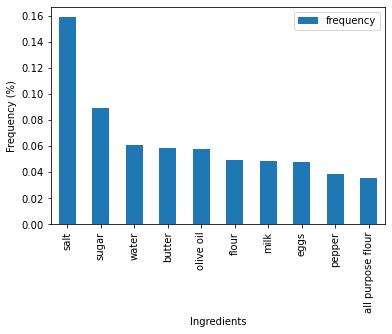

In [17]:
frequency_chart = frequency_df.iloc[0:10]
ax = frequency_chart.plot.bar(x='ingredients', xlabel='Ingredients', y='frequency', ylabel="Frequency (%)")

## Cooking Time

### Distribution of recipes by minutes of preparation

In [18]:
time_distribution_df = recipes_df.copy()
time_distribution_df['time'] = np.where(recipes_df['minutes'] % 30 == 0 , (recipes_df['minutes'] / 30).astype(int) * 30, ((recipes_df['minutes'] / 30 ).astype(int) + 1) * 30) 
time_distribution_df = time_distribution_df[['time','id']]
time_distribution_df = time_distribution_df.groupby('time').count()
time_distribution_df.reset_index(inplace=True)
time_distribution_df = time_distribution_df.rename({'id':'recipe_count'}, axis=1)
time_distribution_df.head()

,time,recipe_count
0,0,12882
1,30,230181
2,60,172751
3,90,74736
4,120,18834


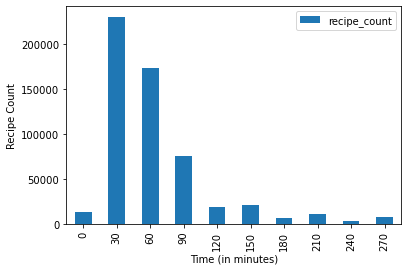

In [19]:
time_distribution_graph = time_distribution_df.iloc[0:10]
ax = time_distribution_graph.plot.bar(x='time', xlabel='Time (in minutes)', y='recipe_count', ylabel="Recipe Count")

## Correlation 

In [22]:
corr_df = merged_recipes_df.copy()
corr_df = corr_df[['recipe_id','minutes','n_ingredients','n_steps','rating']]
corr_df.set_index('recipe_id')
corr_df.head()

,recipe_id,minutes,n_ingredients,n_steps,rating
0,99998,25,7,4,5.0
1,99996,5,6,3,5.0
2,99995,45,7,7,4.8
3,99994,45,5,3,4.5
4,99992,125,5,4,4.6


### Correlation between minutes and ratings

In [23]:
correlation = corr_df['rating'].corr(corr_df['minutes'])
print(correlation)

-0.003792846761259732


### Correlation matrix

<AxesSubplot:>

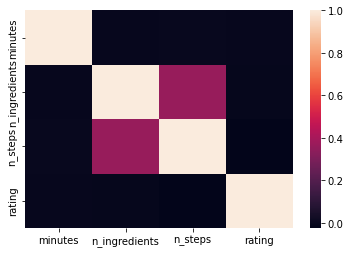

In [24]:
heatmap_df = corr_df.copy()
heatmap_df = heatmap_df.drop('recipe_id', axis=1)
sns.heatmap(heatmap_df.corr())

### Correlation between Ingredients

In [117]:
# 
start = 0
end = start+20
subset_count_ingredients = ingredient_group_df.copy()
subset_count_ingredients = subset_count_ingredients.sort_values(by='recipe_count',ascending=False)
subset_count_ingredients = subset_count_ingredients.iloc[start:end]
ingredients_subset = pd.merge(merged_recipes_exploded, subset_count_ingredients, how='inner', on=['ingredients'])
ingredients_dummies = pd.concat([ingredients_subset[['recipe_id']], pd.get_dummies(ingredients_subset.ingredients)], 1).groupby(['recipe_id']).sum().reset_index()
ingredients_dummies.head()

/var/folders/5b/0vdy5nmd29z46fdb__gqk64h0000gn/T/ipykernel_43405/1044490000.py:8: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  ingredients_dummies = pd.concat([ingredients_subset[['recipe_id']], pd.get_dummies(ingredients_subset.ingredients)], 1).groupby(['recipe_id']).sum().reset_index()


,recipe_id,all purpose flour,baking powder,baking soda,brown sugar,butter,cinnamon,egg,eggs,flour,...,milk,olive oil,onion chopped,pepper,salt,salt and pepper,sugar,vanilla,vegetable oil,water
0,0,1,1,0,0,0,1,1,0,0,...,2,0,0,0,1,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


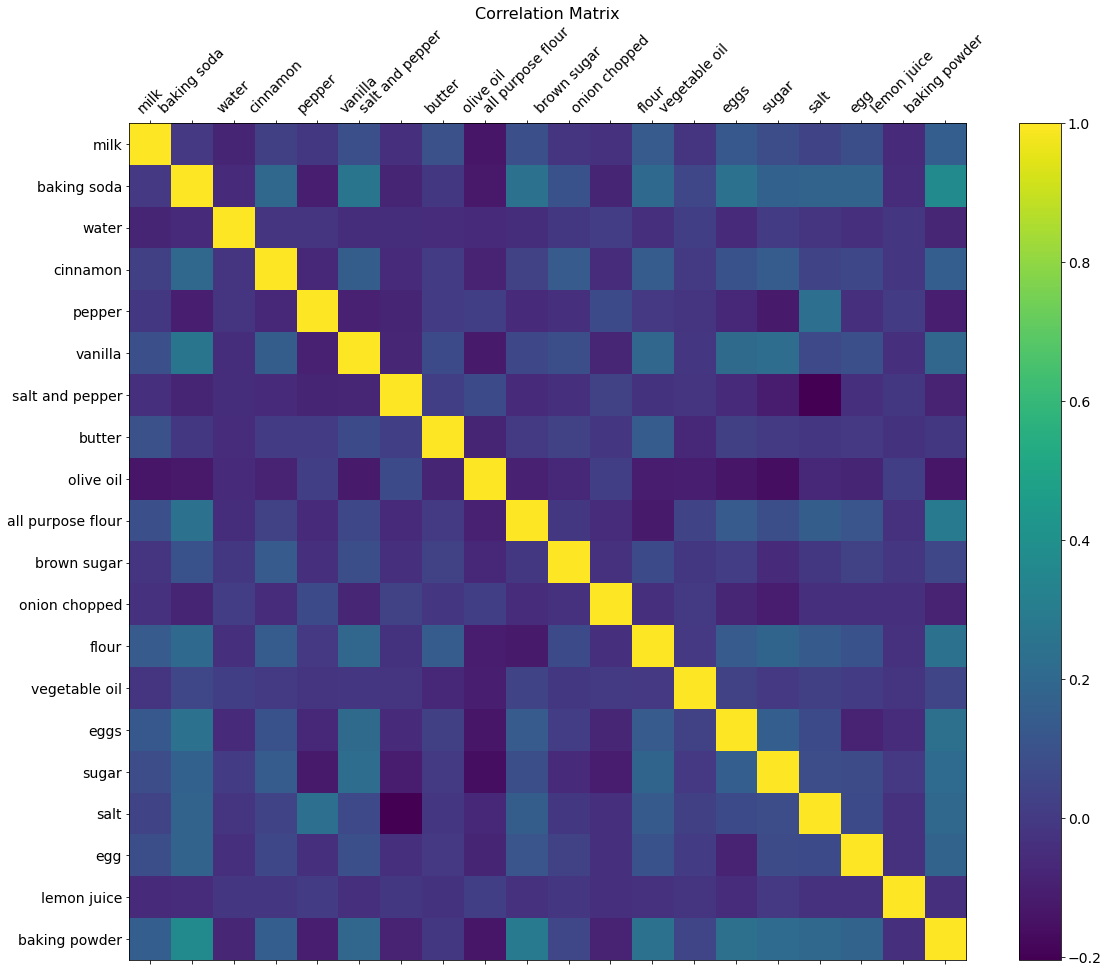

In [119]:
df = ingredients_dummies.copy()
df = df.drop(['recipe_id'], axis=1)
df = df.sample(n=20, axis='columns')
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

## Distribution of no of ingredients per recipe 

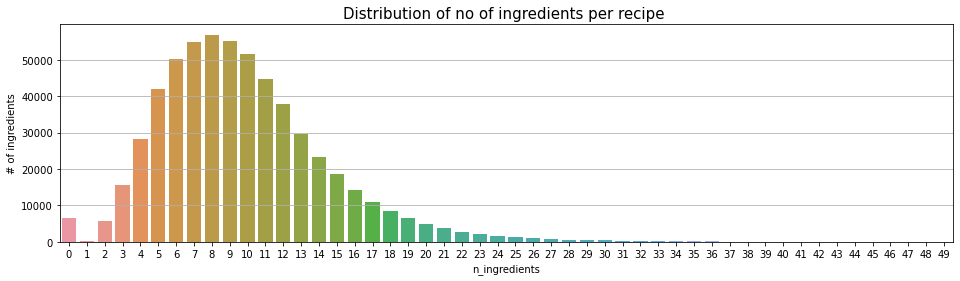

In [28]:
distribution_df = recipes_df.groupby(['n_ingredients']).size().reset_index(name='# of ingredients')
distribution_df = distribution_df[distribution_df['n_ingredients'] < 50]
distribution_df.shape

fig = plt.figure(figsize=(16, 4))
plt.grid()
plt.title('Distribution of no of ingredients per recipe ', fontsize=15)


line_chart = sns.barplot(x='n_ingredients', y='# of ingredients', data=distribution_df)
# line_chart.set(ylim=(0, distribution_df['# of ingredients'].max()))

## Average rating per number of ingredients

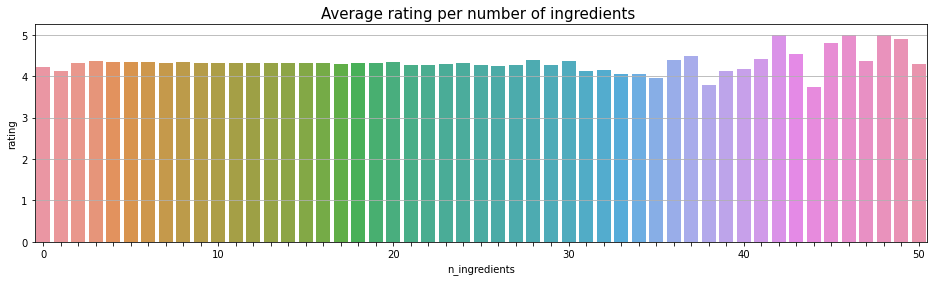

In [29]:
average_rating_per_no_ingredients = ratings_df.groupby(['recipe_id'], as_index=False)['rating'].mean()
average_rating_per_no_ingredients.rename(columns={'recipe_id': 'id'}, inplace=True)

average_rating_per_no_ingredients_m = recipes_df.merge(average_rating_per_no_ingredients, on='id')
average_rating_per_no_ingredients_m

fig = plt.figure(figsize=(16, 4))
plt.grid()
plt.title('Average rating per number of ingredients ', fontsize=15)


line_chart = sns.barplot(x='n_ingredients', y='rating', data=average_rating_per_no_ingredients_m, ci=None)

for ind, label in enumerate(line_chart.get_xticklabels()):
    if ind % 10 == 0:  # every 9th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
# line_chart.set(ylim=(0, distribution_df['rating'].max()))

## Average number of nutritional elements, for every rating.

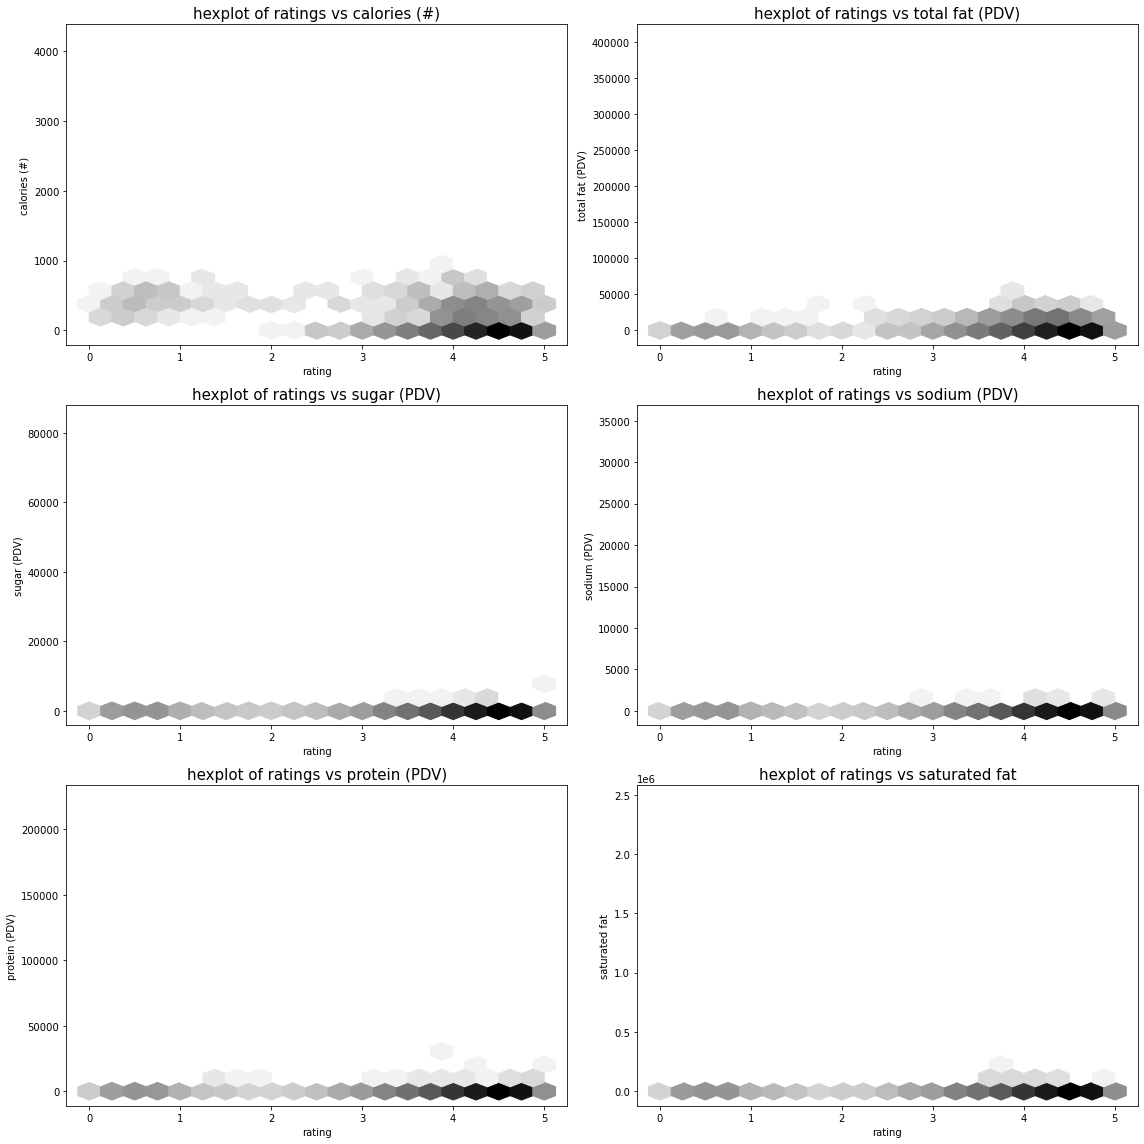

In [40]:
average_rating_per_no_ingredients_df = average_rating_per_no_ingredients_m.copy()
average_rating_per_no_ingredients_df = average_rating_per_no_ingredients_df[
    average_rating_per_no_ingredients_df['nutrition'] != "[]"]
average_rating_per_no_ingredients_df['nutrition'] = average_rating_per_no_ingredients_df['nutrition'].apply(literal_eval)
average_rating_per_no_ingredients_m_exploded = average_rating_per_no_ingredients_df.explode("nutrition")
average_rating_per_no_ingredients_df = average_rating_per_no_ingredients_df[
    average_rating_per_no_ingredients_df['nutrition'] != "''"]
nutrition_info = ['calories (#)', 'total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)', 'protein (PDV)', 'saturated fat']
nutrition_df = pd.DataFrame()
all_nutrition_df = pd.DataFrame()

plt.figure(figsize=(16, 16))

for index, nutrition in enumerate(nutrition_info):
    nutrition_df = average_rating_per_no_ingredients_m_exploded.groupby('id').nth(index)
    nutrition_df = nutrition_df[['rating', 'nutrition']]
    nutrition_df['nutrition'] = nutrition_df['nutrition'].str.replace("RE", "")
    nutrition_df['nutrition'] = nutrition_df['nutrition'].apply(lambda x: x if x != '' else 0.0)
    nutrition_df['nutrition'] = nutrition_df['nutrition'].astype(float)
    nutrition_df = nutrition_df.groupby(['rating'])['nutrition'].apply(np.mean).reset_index()
    if('rating' not in list(all_nutrition_df.columns.values)):
        all_nutrition_df['rating'] = nutrition_df['rating']
    all_nutrition_df[nutrition] = nutrition_df['nutrition']
    plt.subplot(3, 2, index+1)
    plt.title('hexplot of ratings vs ' + nutrition, fontsize=15)
    hexplot_chart = plt.hexbin(x=all_nutrition_df['rating'], y=all_nutrition_df[nutrition], gridsize=20, bins='log', cmap='Greys')
    plt.xlabel("rating", fontsize=10)
    plt.ylabel(nutrition,fontsize=10) 
    plt.tight_layout()